In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Leemos el dataset de los resultados

In [4]:
resultados = pd.read_csv("resultados/resultado.csv");
resultados.head()

,threadsLectura,threadsMaximo,cantArchivos,TIEMPO_MAX,TIEMPO_CARGAR,EXPERIMENTO
0,1,1,8,0.983960,980.9115,1
1,1,2,8,1.099565,946.0245,1
2,1,3,8,0.920792,974.7115,1
3,1,4,8,0.900413,989.6945,1
4,1,5,8,0.815309,975.0535,1


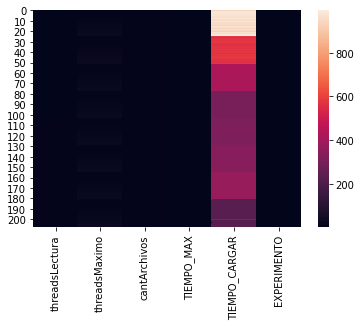

In [5]:
sns.heatmap(resultados[resultados['EXPERIMENTO'] == 1])

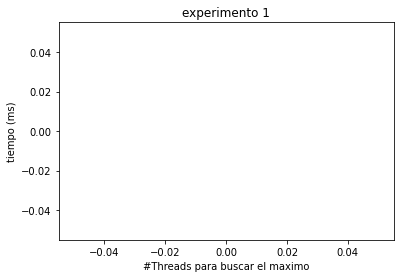

In [3]:
# densidad media
maximos = resultados[(resultados["cantArchivos"]==  49) & (resultados["threadsLectura"]== 30)].copy();
#print(maximos)
fig = sns.scatterplot(data=maximos, x='threadsMaximo', y='TIEMPO_MAX', color="b", label="maximo");
fig.set_title('experimento 1')
fig.set(xlabel='#Threads para buscar el maximo', ylabel='tiempo (ms)');
plt.savefig("MaximoParalelo");

In [ ]:
# densidad media
maximos = resultados[(resultados["cantArchivos"] ==  10) & (resultados["threadsMaximo"]== 1)].copy();
#print(maximos)
fig = sns.scatterplot(data=maximos, x='threadsLectura', y='TIEMPO_CARGAR', color="b", label="cargar archivos");
fig.set_title('experimeto 2')
fig.set(xlabel='#Threads para cargar archivos', ylabel='tiempo (ms)');
plt.savefig("MaximoParalelo");

### HEATMAP

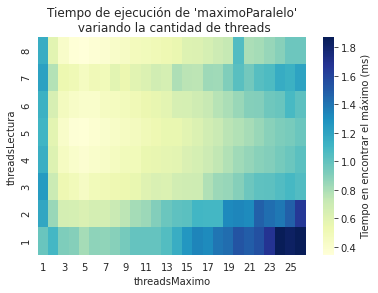

In [63]:
# Graficamos los tie& (bt_resultados["dataset"]=="densidad-media-optimalidad")mpos de ejecución de cada dataset en función de n.
# complejidad_DP = resultados[(bt_resultados["metodo"]=="DP") & (bt_resultados["dataset"]=="programacion-dinamica")].copy();

#fig, ax = plt.subplots(figsize = (6, 4))
heatmap1_data = pd.pivot_table(resultados[resultados['EXPERIMENTO'] == 1], values='TIEMPO_MAX', index=['threadsLectura'], columns='threadsMaximo')
heatmap1_data.sort_index(axis=0, ascending=False, inplace=True)
foto = sns.heatmap(heatmap1_data, cmap="YlGnBu", cbar_kws={'label': 'Tiempo en encontrar el máximo (ms)'})
foto.set_title('Tiempo de ejecución de \'maximoParalelo\'\n variando la cantidad de threads')

foto = foto.get_figure()
foto.savefig("hm_tm_tl_tmax")

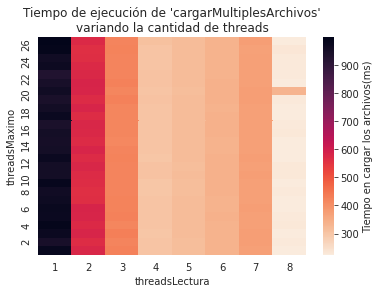

In [61]:
heatmap1_data = pd.pivot_table(resultados[resultados['EXPERIMENTO'] == 1], values='TIEMPO_CARGAR', index=['threadsMaximo'], columns='threadsLectura')
heatmap1_data.sort_index(axis=0, ascending=False, inplace=True)
foto = sns.heatmap(heatmap1_data, cmap=sns.cm.rocket_r, cbar_kws={'label': 'Tiempo en cargar los archivos(ms)'})
foto.set_title('Tiempo de ejecución de \'cargarMultiplesArchivos\'\nvariando la cantidad de threads')
#foto.set(ylabel='Tiempo en encontrar el máximo (ms)', xlabel='threads')

foto = foto.get_figure()
foto.savefig("hm_tm_tl_tload_1")

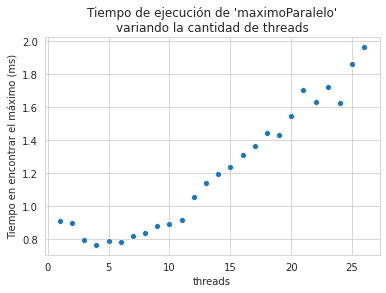

In [57]:
sns.set_style("whitegrid")
df_tmax = resultados[resultados['EXPERIMENTO'] == 2]
df_tmax = df_tmax[["threadsMaximo","TIEMPO_MAX"]]
ax = sns.scatterplot(data=df_tmax, x="threadsMaximo", y="TIEMPO_MAX")
ax.set_title('Tiempo de ejecución de \'maximoParalelo\'\nvariando la cantidad de threads')
ax.set(ylabel='Tiempo en encontrar el máximo (ms)', xlabel='threads')

fig = ax.get_figure()
fig.savefig("sp_tm_tmax")

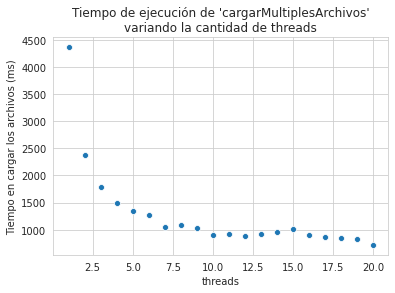

In [66]:
sns.set_style("whitegrid")
df_tmax = resultados[resultados['EXPERIMENTO'] == 3]
df_tmax = df_tmax[["threadsLectura","TIEMPO_CARGAR"]]
ax = sns.scatterplot(data=df_tmax, x="threadsLectura", y="TIEMPO_CARGAR")
ax.set_title('Tiempo de ejecución de \'cargarMultiplesArchivos\'\nvariando la cantidad de threads')
ax.set(ylabel='Tiempo en cargar los archivos (ms)', xlabel='threads')

fig = ax.get_figure()
fig.savefig("sp_tl_tload")

In [68]:
df_load = resultados[resultados['EXPERIMENTO'] == 4]
df_load = df_load[["cantArchivos","threadsLectura","TIEMPO_CARGAR"]]
df_load.head()

,cantArchivos,threadsLectura,TIEMPO_CARGAR
254,1,1,38.56690
255,2,1,103.02950
256,2,2,54.69245
257,3,1,192.66050
258,3,2,106.52700


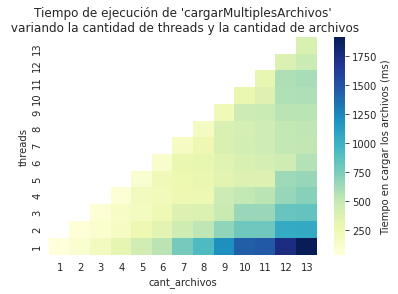

In [89]:
hm_data = pd.pivot_table(df_load, values='TIEMPO_CARGAR', index=['threadsLectura'], columns='cantArchivos')
hm_data.sort_index(axis=0, ascending=False, inplace=True)
ax = sns.heatmap(hm_data, cmap='YlGnBu', cbar_kws={'label': 'Tiempo en cargar los archivos (ms)'})
ax.set_ylabel('threads')
ax.set_xlabel('cant_archivos')

ax.set_title('Tiempo de ejecución de \'cargarMultiplesArchivos\'\n variando la cantidad de threads y la cantidad de archivos')
#foto.set(ylabel='Tiempo en encontrar el máximo (ms)', xlabel='threads')

fig = ax.get_figure()
fig.savefig("hm_nf_tl_tload")

# Graficos finales

In [31]:
resultadoNORMAL = pd.read_csv("resultados/resultadoNORMAL.csv");
resultadoUNIFORME = pd.read_csv("resultados/resultadoUNIFORME.csv");
resultadoEXPONENCIAL = pd.read_csv("resultados/resultadoEXPO.csv");


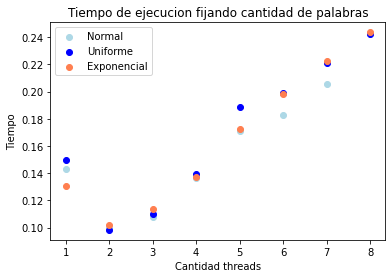

In [33]:
plt.scatter(resultadoNORMAL['threadsMaximo'],resultadoNORMAL['TIEMPO_MAX'], c='lightblue')
plt.scatter(resultadoUNIFORME['threadsMaximo'],resultadoUNIFORME['TIEMPO_MAX'], c='blue')
plt.scatter(resultadoEXPONENCIAL['threadsMaximo'],resultadoEXPONENCIAL['TIEMPO_MAX'], c='coral')
classes = ['Normal', 'Uniforme', 'Exponencial']
#x = [5,6,7,8]
#y = [1,3,5,2]

#plt.scatter(x, y, c='lightblue')
plt.legend(labels=classes)
plt.title('Tiempo de ejecucion fijando cantidad de palabras')
plt.xlabel('Cantidad threads')
plt.ylabel('Tiempo')
plt.savefig('resultado_comparacion_distribuciones.png')
plt.show()